In [1]:
import sys
sys.path.insert(0,'C:\\code\\python_for_the_financial_economist\\')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

"""
Own packages
"""


from codelib.visualization.layout import DefaultStyle
DefaultStyle();

# Multivariate statistics 

In this Jupyter notebook, we will look at multivariate statistics. In particular, we will look at how we can use (primarily) the `scipy.stats` package (see docs [here](https://docs.scipy.org/doc/scipy/reference/stats.html)) to work with random variables, distributions, moments, etc. 


## Random variables

The concept of a random variable generalizes to the multivariate context. A multivariate random variable or a random vector, $\mathbf{X} = (X_1, ... , X_n)^\top$, is a vector of scalar random variables such that $\mathbf{X}: \Omega \mapsto \mathbb{R}^n$. 

Similar to the case of univariate or scaler random variables, we can characterize the distribution of the random vector in different ways. 


### Probability density function 

If $\mathbf{X}: \Omega \to \mathbb{R}^n$ is a continuous random variable, then $f_{\mathbf{X}}$ is a [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) if 

$$
f_{\mathbf{X}}({\mathbf{x}}) \geq \mathbf{0}
$$

and 

$$
\intop_{\mathbf{R}^n} f_{\mathbf{X}}({\mathbf{x}})d\mathbf{x} = \intop_{-\infty}^\infty \ldots \intop_{-\infty}^\infty f_{\mathbf{X}}(x_1, ... ,x_n)dx_1 \ldots dx_n = 1
$$


__Example: Normal distribution__

The density of a [multivariate normal distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) is given by 

$$
f_{\mathbf {X} }(x_{1},\ldots ,x_{n})={\frac {\exp \left(-{\frac {1}{2}}({\mathbf {x} }-{\boldsymbol {\mu }})^{\top }{\boldsymbol {\Sigma }}^{-1}({\mathbf {x} }-{\boldsymbol {\mu }})\right)}{\sqrt {(2\pi )^{n}|{\boldsymbol {\Sigma }}|}}}
$$

where $\boldsymbol {\mu }$ is a vector of expected values and $\boldsymbol {\Sigma }$ is the covariance matrix. 


We can use the `multivariate_normal` class in `scipy.stats` to work with the multivariate normal distribution (note that `scipy.stats` is imported as `stats`). See documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal).

We consider the two bivariate models defined by respectively

$$
\boldsymbol{\mu} =\begin{bmatrix} 0.0 \\ 0.0 \end{bmatrix}, \; \; \boldsymbol{\Sigma} =\begin{bmatrix} 1.0 & 0.0\\ 0.0 & 1.0 \end{bmatrix}
$$

and 

$$
\boldsymbol{\mu} =\begin{bmatrix} 0.0 \\ 0.0 \end{bmatrix}, \; \; \boldsymbol{\Sigma} =\begin{bmatrix} 1.0 & 0.75\\ 0.75 & 1.0 \end{bmatrix}
$$

We want to compare the pdfs of these specifications. 

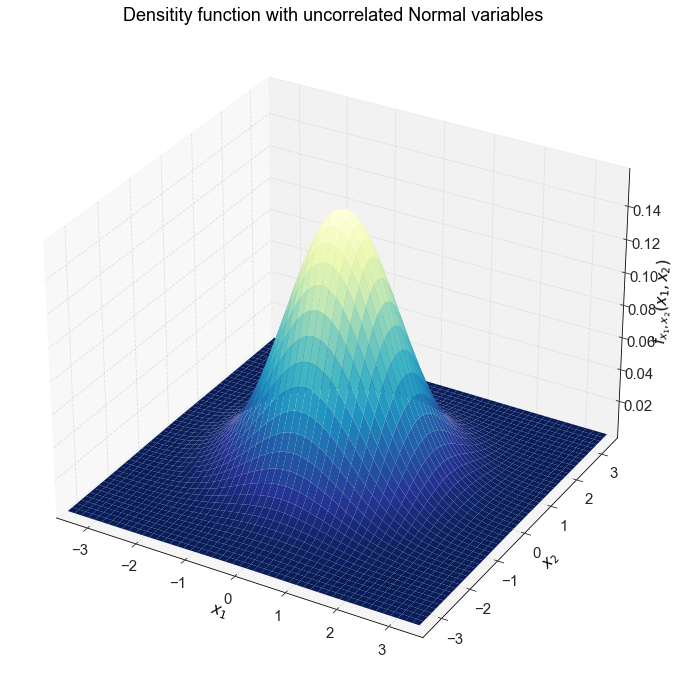

In [2]:
# define input variables
mu = np.zeros(2)
sigma1 = np.ones((2,2))
sigma1[0, 1] = sigma1[1, 0] = 0.0
sigma2 = np.ones((2,2))
sigma2[0, 1] = sigma2[1, 0] = 0.75

# define x values to evaluate the pdf at 
x1_values = x2_values = np.linspace(-3.5, 3.5, 1000)
x1_values, x2_values = np.meshgrid(x1_values, x2_values)
x_values = np.dstack((x1_values, x2_values))

# evaluate the pdf
pdf_mod1_values = stats.multivariate_normal.pdf(x_values, mean=mu, cov=sigma1)
pdf_mod2_values = stats.multivariate_normal.pdf(x_values, mean=mu, cov=sigma2)

# plot the pdf
fig = plt.figure(figsize=(14,12))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(x1_values, x2_values, pdf_mod1_values, cmap='YlGnBu_r')
ax.set_title('Densitity function with uncorrelated Normal variables');
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f_{x_1, x_2}(x_1, x_2)$');

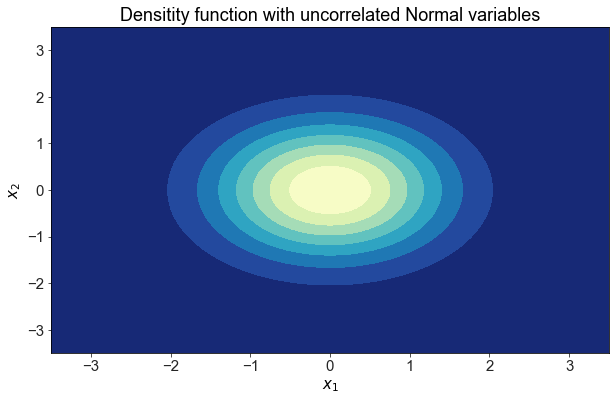

In [3]:
# plot the pdf, level curves
fig, ax = plt.subplots(figsize=(10, 6))

ax.contourf(x1_values, x2_values, pdf_mod1_values, cmap='YlGnBu_r')
ax.set_title('Densitity function with uncorrelated Normal variables');
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

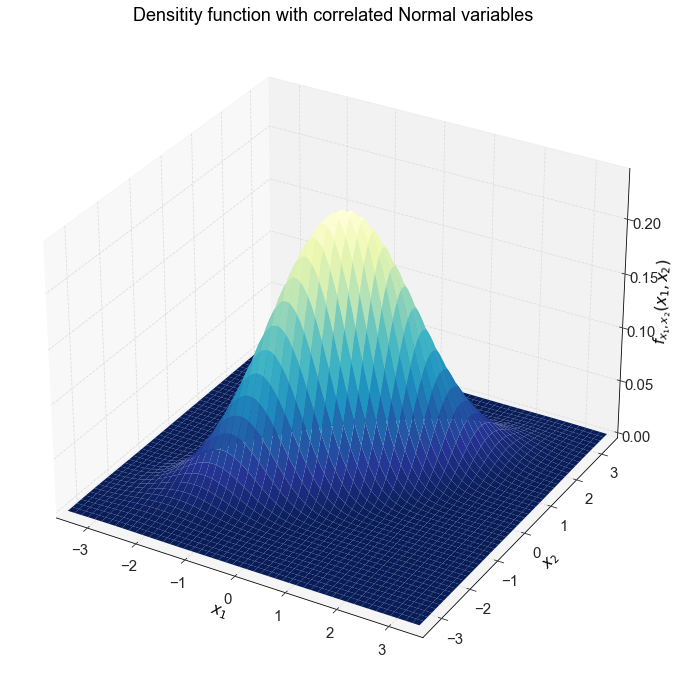

In [4]:
fig = plt.figure(figsize=(14, 12))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(x1_values, x2_values, pdf_mod2_values, cmap='YlGnBu_r')
ax.set_title('Densitity function with correlated Normal variables');
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f_{x_1, x_2}(x_1, x_2)$');

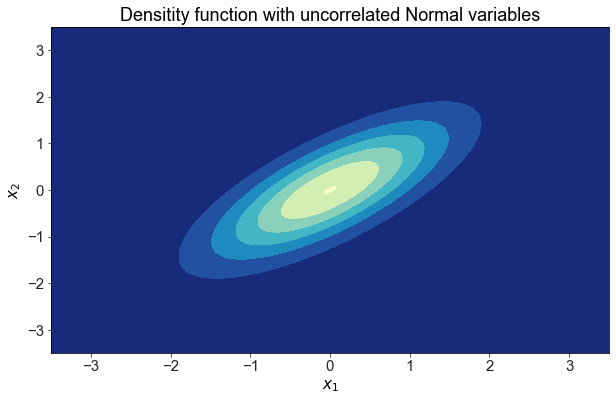

In [5]:
# plot the pdf, level curves
fig, ax = plt.subplots(figsize=(10, 6))

ax.contourf(x1_values, x2_values, pdf_mod2_values, cmap='YlGnBu_r')
ax.set_title('Densitity function with uncorrelated Normal variables');
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');

### Cumulative distribution function 

The multivariate version of the cumulative distribution function,  $F_\mathbf{X}: \mathbf{R}
^n \mapsto [0, 1]$, is defined by 


$$
F_\mathbf{X}(\mathbf{x}) =  \intop_{-\infty}^{x_1} \ldots \intop_{-\infty}^{x_n} f_{\mathbf{X}}(u_1, ... ,u_n)du_1 \ldots du_n =  P(X_1 \leq x_1, \ldots, X_n \leq x_n) 
$$

__Example: Multivariate Normal distribution__

Consider the previous example. Calculate the probability that $X_1 < -1$ and $X_2 < -1$ for the two cases. 


In [6]:
# evaluate the cdfs
cdf_mod1 = stats.multivariate_normal.cdf([-1, -1], mean=mu, cov=sigma1)
cdf_mod2 = stats.multivariate_normal.cdf([-1, -1], mean=mu, cov=sigma2)

In [7]:
cdf_mod1

0.025171489600055108

In [8]:
"""
The probability is much larger since the variables are positively correlated
"""

cdf_mod2

0.09045695072001239

### Characteristic function 

The [characteristic function](https://en.wikipedia.org/wiki/Characteristic_function_(probability_theory)) is defined by the expectation 

$$
\varphi_\mathbf{X}(t) \equiv \text{E}\left[ e^{i \mathbf{t}^\top X} \right]
$$

where $i = \sqrt{-1}$ is the [imaginary unit](https://en.wikipedia.org/wiki/Imaginary_unit). It can takes complex values such that $\varphi_X: \mathbb{R} \to \mathbb{C}$. 

## Marginal distribution and dependence

We may only be interested in a subset of the  variables in the $n$-dimensional random vector $\mathbf{X}$. Let $\mathbf{X}_A$ be $k$-dimensional and $\mathbf{X}_B$ be $(n-k)$-dimensional. 

$$
\mathbf{X} = \begin{bmatrix} \mathbf{X}_A \\ \mathbf{X}_B \end{bmatrix}
$$

### Marginal distribution 

The marginal distribution of $\mathbf{X}_B$ is the distribution obtained by "disregarding" $\mathbf{X}_A$. Since $\mathbf{X}_A$ can take any value, we can obtain the cdf as

$$
F_{\mathbf{X}_B}(\mathbf{x}_B) =  \intop_{-\infty}^{\infty} \ldots \intop_{-\infty}^{\infty} \intop_{-\infty}^{x_{k+1}} \ldots \intop_{-\infty}^{x_n} f_{\mathbf{X}}(u_1, ... ,u_n)du_1 \ldots du_n =  P(X_1 < \infty, \ldots, X_k < \infty, X_{k+1} \leq x_{k+1} \ldots, X_n \leq x_n) 
$$

and the pdf is obtained by "integrating out" $\mathbf{x}_A$

$$
f_{\mathbf{X}_B}(\mathbf{x}_B) \equiv \intop_{\mathbf{R}^K} f_{\mathbf{X}}(\mathbf{x}_A, \mathbf{x}_B) d\mathbf{x}_A
$$

### Dependence

The conditional density of $\mathbf{X}_B$ given $\mathbf{X}_A$ is defined by 

$$
f_{\mathbf{X}_B \vert \mathbf{x}_A }(\mathbf{x}_B ) = \frac{f_{\mathbf{X}}(\mathbf{x}_A, \mathbf{x}_B)}{f_{\mathbf{X}_A}(\mathbf{x}_A)}
$$

$\mathbf{X}_B$ and $\mathbf{X}_A$ are __independent__ if and only if 

$$f_{\mathbf{X}}(\mathbf{x}_A, \mathbf{x}_B) = f_{\mathbf{X}_A}(\mathbf{x}_A) f_{\mathbf{X}_B}(\mathbf{x}_B )$$

Equivalently, we have that the marginal distribution is equal to the conditional distribution $f_{\mathbf{X}_B \vert \mathbf{x}_A }(\mathbf{x}_B ) =f_{\mathbf{X}_B}(\mathbf{x}_B )$. 


## Expected value, variance and covariance 


### Expected value 

The expected value of of a random vector $\mathbf{X}$  which we will denote by $\text{E}[\mathbf{X}] = \boldsymbol{\mu}$ is equal to 

$$
\text{E}[\mathbf{X}] = \begin{bmatrix} \text{E}[X_1] & \ldots & \text{E}[X_n] \end{bmatrix}^\top
$$

We have the property that when $\mathbf{A} + \mathbf{B} \mathbf{X}$ is defined then 

$$
\text{E}[\mathbf{A} + \mathbf{B} \mathbf{X}] =\mathbf{A} +  \mathbf{B} \text{E}[ \mathbf{X}]
$$

This implies e.g. that 

$$
\text{E}[a_1 X_1 + \ldots + a_n X_n] = a_1 \text{E}[X_1] + \ldots + a_n \text{E}[X_n]
$$


If $g(\mathbf{X})$ is a well-defined function 

$$
\begin{equation*}
\text{E}[g(\mathbf{X})] = \int _{\mathbb{R}^n} g(\mathbf{X}) f_{\mathbf{X}}(\mathbf{x}) d\mathbf{x}
\end{equation*}
$$


### Variance and covariance

Given any two random variables $X$ and $Y$ with finite variance, define the covariance of $X$ and $Y$  as 

$$
\begin{equation*}
\text{Cov}[X,Y]= \text{E}[(X- \mu_x)(Y- \mu_y)] = \text{E}[XY] - \text{E}[X]\text{E}[Y]
\end{equation*}
$$

If $X$ and $Y$ are independent then $\text{Cov}[X,Y] = 0$, but a zero covariance does not necessarily imply independence!

For a random vector, we define the *variance-covariance* matrix (we typically denote it $\boldsymbol{\Sigma}$)

$$
\boldsymbol{\Sigma} = \text{Var}[\mathbf{X}] = \text{E}[(\mathbf{X} - \text{E}[X])(\mathbf{X} - \text{E}[X])^\top] = \text{E}[\mathbf{X}\mathbf{X}^\top] - \text{E}[\mathbf{X}]\text{E}[\mathbf{X}]^\top
$$

where the $(i, j)$'th element is equal to the covariance between $X_i$ and $X_j$. 

The variance-covariance matrix is

* [Symmetric](https://en.wikipedia.org/wiki/Symmetric_matrix)
$$
\boldsymbol{\Sigma} = \boldsymbol{\Sigma}^\top
$$

* [Positive semidefinite](https://en.wikipedia.org/wiki/Definite_matrix)
$$
\mathbf{w}^\top \boldsymbol{\Sigma} \mathbf{w} \geq 0 \; \text{for all} \; \mathbf{w} \in \mathbb{R}^n
$$

__Variance of an affine transformation__

We have the rule that for a random vector

$$
\text{Var}[\mathbf{A} + \mathbf{B}\mathbf{X}] = \mathbf{B}\text{Var}[\mathbf{X}]\mathbf{B}^\top
$$

__Cross-covariance__

We can define the covariance between two random vectors as 

$$
\text{Cov}[\mathbf{X}, \mathbf{Y}] = \text{E}[(\mathbf{X} - \text{E}[X])(\mathbf{Y} - \text{E}[Y])^\top] = \text{E}[\mathbf{X}\mathbf{Y}^\top] - \text{E}[\mathbf{X}]\text{E}[\mathbf{Y}]^\top
$$

In this case, we have

$$
\text{Cov}[\mathbf{A}\mathbf{X}, \mathbf{B}\mathbf{Y}] = \mathbf{A} \text{Cov}[\mathbf{X}, \mathbf{Y}]\mathbf{B}^\top
$$


### Correlation

The covariance is determined not only by the degree of linear dependency between $X$ and $Y$ but also the scale of $X$ and $Y$ which motivates the use of correlation. 

The correlation coefficient is defined as 

$$
\rho_{X,Y} = \text{Corr}[X,Y] = \frac{\text{Cov}[X,Y] }{\sqrt{\text{Var}[X]\text{Var}[Y]}}
$$

which will be independent of the scale of $X$ and $Y$. 

The correlation coefficent will take values $\rho_{X,Y} \in [-1, 1]$, where $\rho_{X,Y} < 0$ and $\rho_{X,Y} > 0$ will correspond to respectively negatively and positively correlated random variables. If $\rho_{X,Y} = 0$ then the two random variables are uncorrelated. 

We will be able to define the correlation matrix $\mathbf{Corr}$

$$
\mathbf{Corr}(\mathbf{X}) =  \mathbf{D} \boldsymbol{\Sigma} \mathbf{D}
$$
where
$$
\mathbf{D} = \text{Dg}(\sigma_1^{-1}, ..., \sigma_n^{-1})
$$
is a diagonal matrix of the inverse of the standard deviations. 



## Problem with correlation and covariance

The covariance and correlation measure only linear dependence, e.g. if $b$ is positive and two random variables $X$ and $Y$ are related by $X = a + b Y$ then the correlation is $1$. 

However, if there is a non-linear relationship between the two random variables, then there is no guarantee that we will have a positive or negative correlation. Below we plot a situation where correlation as a measure makes sense and another situation where it does not make sense. In the left figure, we plot simulated observation from a uncorrelated bivariate normal. Naturally, since the distribution only dependence on the mean and covariance matrix, a correlation of zero is equivalent to independence. In the right figure, $X$ and $Y$ are clearly related, but the correlation is also zero!

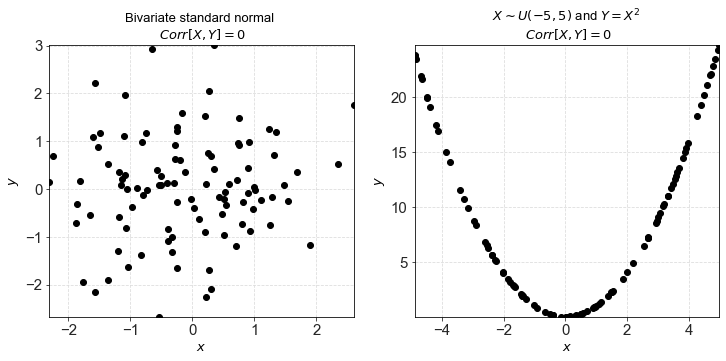

In [64]:
data1 = stats.multivariate_normal.rvs(mean=np.zeros(2),
                                  cov=np.array([[1, 0],[0,1]]),
                                  size=100)

fig, ax = plt.subplots(1,2, figsize=(12,5))

"""
Bivariate normal
"""

ax1 = ax[0]

ax1.scatter(data1[:,0],data1[:,1], color="black")

ax1.set_title('Bivariate standard normal \n $Corr[X,Y]=0$', size=13)
ax1.set_xlabel('$x$', size=13)
ax1.set_ylabel('$y$', size=13)

"""
Uniform 
"""

x = stats.uniform.rvs(loc=-5, scale=10, size=100)
y = x**2

ax2 = ax[1]

ax2.scatter(x,y, color="black")

ax2.set_title('$X\sim U(-5, 5)$ and $Y = X^2$ \n $Corr[X,Y]=0$', size=13)
ax2.set_xlabel('$x$', size=13);
ax2.set_ylabel('$y$', size=13);

# References

## Articles

## Books
